# Random Forest Classifier

In [108]:
# Predicting movie success based on budget and popularity

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Data Preprocessing

In [109]:
data  = pd.read_csv('movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [110]:
dataset = data[["budget","revenue","popularity"]].copy()
dataset.dropna(inplace=True)

In [111]:
dataset.head()

,budget,revenue,popularity
0,237000000,2787965087,150.437577
1,300000000,961000000,139.082615
2,245000000,880674609,107.376788
3,250000000,1084939099,112.312950
4,260000000,284139100,43.926995


In [112]:
median_revenue = dataset['revenue'].median()
dataset.loc[:,'success']=(dataset['revenue']>median_revenue).astype(int)

In [113]:
dataset.head()

,budget,revenue,popularity,success
0,237000000,2787965087,150.437577,1
1,300000000,961000000,139.082615,1
2,245000000,880674609,107.376788,1
3,250000000,1084939099,112.312950,1
4,260000000,284139100,43.926995,1


In [114]:
x = dataset[['budget','popularity']]
y = dataset['success']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
# Set feature names after fitting
rf_classifier.feature_names = ['budget', 'popularity']

In [117]:
# Predict success on the test set
y_pred = rf_classifier.predict(x_test)

In [118]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
con_mat=confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)

In [119]:
print("Accuracy: ",accuracy)
print("Confusion matrix:\n ",con_mat)
print("Classification Report:\n ",class_report)

Accuracy:  0.8335067637877211
Confusion matrix:
  [[396  95]
 [ 65 405]]
Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.81      0.83       491
           1       0.81      0.86      0.84       470

    accuracy                           0.83       961
   macro avg       0.83      0.83      0.83       961
weighted avg       0.84      0.83      0.83       961



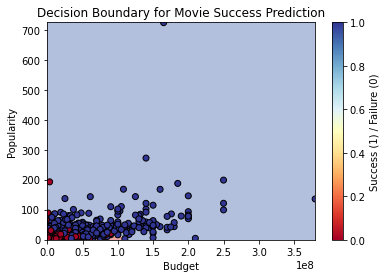

In [120]:

# Plotting the decision boundary
x_min, x_max = x_test['budget'].min() - 1, x_test['budget'].max() + 1
y_min, y_max = x_test['popularity'].min() - 1, x_test['popularity'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(x_test['budget'], x_test['popularity'], c=y_test, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel("Budget")
plt.ylabel("Popularity")
plt.title("Decision Boundary for Movie Success Prediction")
plt.colorbar(label="Success (1) / Failure (0)")
plt.show()